In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicting-poverty/train_values_wJZrCmI.csv
/kaggle/input/predicting-poverty/test_values.csv
/kaggle/input/predicting-poverty/train_labels.csv


In [2]:
df_train = pd.read_csv("/kaggle/input/predicting-poverty/train_values_wJZrCmI.csv")
df_labels = pd.read_csv("/kaggle/input/predicting-poverty/train_labels.csv")

In [3]:
df_train.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,reg_formal_nbfi_account,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,1
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,False,True,True,False,False,False,False,1,0,0
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,False,0,0,0
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,False,0,0,0
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,False,1,0,3


In [4]:
df_labels.head()

,row_id,poverty_probability
0,0,0.515
1,1,0.981
2,2,0.982
3,3,0.879
4,4,0.796


In [5]:
merged_df = pd.merge(df_train, df_labels, on='row_id', how='inner') 

In [6]:
merged_df.head()

,row_id,country,is_urban,age,female,married,religion,relationship_to_hh_head,education_level,literacy,...,financially_included,active_bank_user,active_mm_user,active_formal_nbfi_user,active_informal_nbfi_user,nonreg_active_mm_user,num_formal_institutions_last_year,num_informal_institutions_last_year,num_financial_activities_last_year,poverty_probability
0,0,C,False,18.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,1,0.515
1,1,C,True,30.0,True,True,P,Other,1.0,True,...,True,True,False,False,False,False,1,0,0,0.981
2,2,A,False,20.0,True,True,Q,Spouse,1.0,True,...,False,False,False,False,False,False,0,0,0,0.982
3,3,A,False,61.0,False,True,Q,Head,0.0,False,...,False,False,False,False,False,False,0,0,0,0.879
4,4,D,False,26.0,True,True,X,Spouse,1.0,True,...,False,False,False,False,False,False,1,0,3,0.796


### Performing Exploratory Data Analysis(EDA)


In [7]:
df = merged_df.copy()
print("First 5 rows of the dataset:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


First 5 rows of the dataset:
   row_id country  is_urban   age  female  married religion  \
0       0       C     False  18.0    True     True        P   
1       1       C      True  30.0    True     True        P   
2       2       A     False  20.0    True     True        Q   
3       3       A     False  61.0   False     True        Q   
4       4       D     False  26.0    True     True        X   

  relationship_to_hh_head  education_level  literacy  ...  \
0                   Other              1.0      True  ...   
1                   Other              1.0      True  ...   
2                  Spouse              1.0      True  ...   
3                    Head              0.0     False  ...   
4                  Spouse              1.0      True  ...   

   financially_included  active_bank_user  active_mm_user  \
0                  True              True           False   
1                  True              True           False   
2                 False             False 

In [8]:
# Distribution of categorical variables
categorical_columns = ['country', 'is_urban', 'female', 'married', 'religion', 'relationship_to_hh_head', 'education_level', 'literacy', 'financially_included', 'active_bank_user', 'active_mm_user', 'active_formal_nbfi_user', 'active_informal_nbfi_user', 'nonreg_active_mm_user']
for col in categorical_columns:
    print(f"\nDistribution of {col}:")
    print(df[col].value_counts())


Distribution of country:
country
J    1843
D    1829
I    1812
G    1805
A    1773
C    1769
F    1769
Name: count, dtype: int64

Distribution of is_urban:
is_urban
False    8460
True     4140
Name: count, dtype: int64

Distribution of female:
female
True     7028
False    5572
Name: count, dtype: int64

Distribution of married:
married
True     8172
False    4428
Name: count, dtype: int64

Distribution of religion:
religion
Q    5469
X    5297
P    1694
O      85
N      55
Name: count, dtype: int64

Distribution of relationship_to_hh_head:
relationship_to_hh_head
Head              5229
Spouse            4162
Son/Daughter      2177
Father/Mother      415
Other              321
Sister/Brother     278
Unknown             18
Name: count, dtype: int64

Distribution of education_level:
education_level
1.0    4550
2.0    4083
0.0    2545
3.0    1186
Name: count, dtype: int64

Distribution of literacy:
literacy
True     7736
False    4864
Name: count, dtype: int64

Distribution of financiall

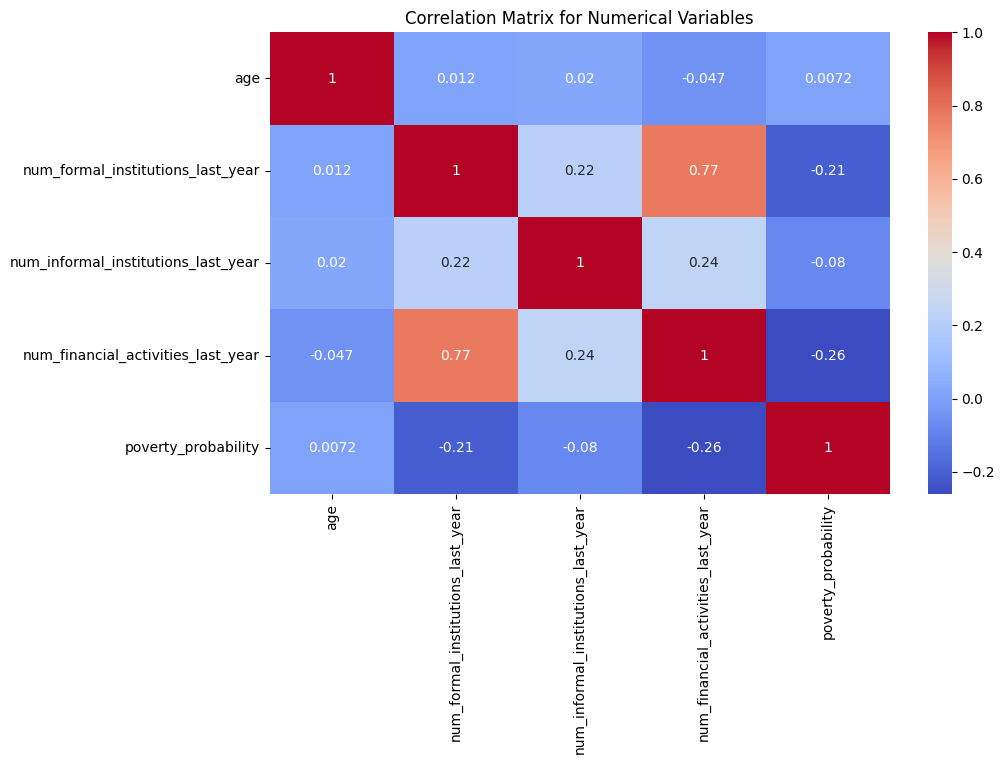

In [9]:
numerical_columns = ['age', 'num_formal_institutions_last_year', 'num_informal_institutions_last_year', 'num_financial_activities_last_year', 'poverty_probability']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

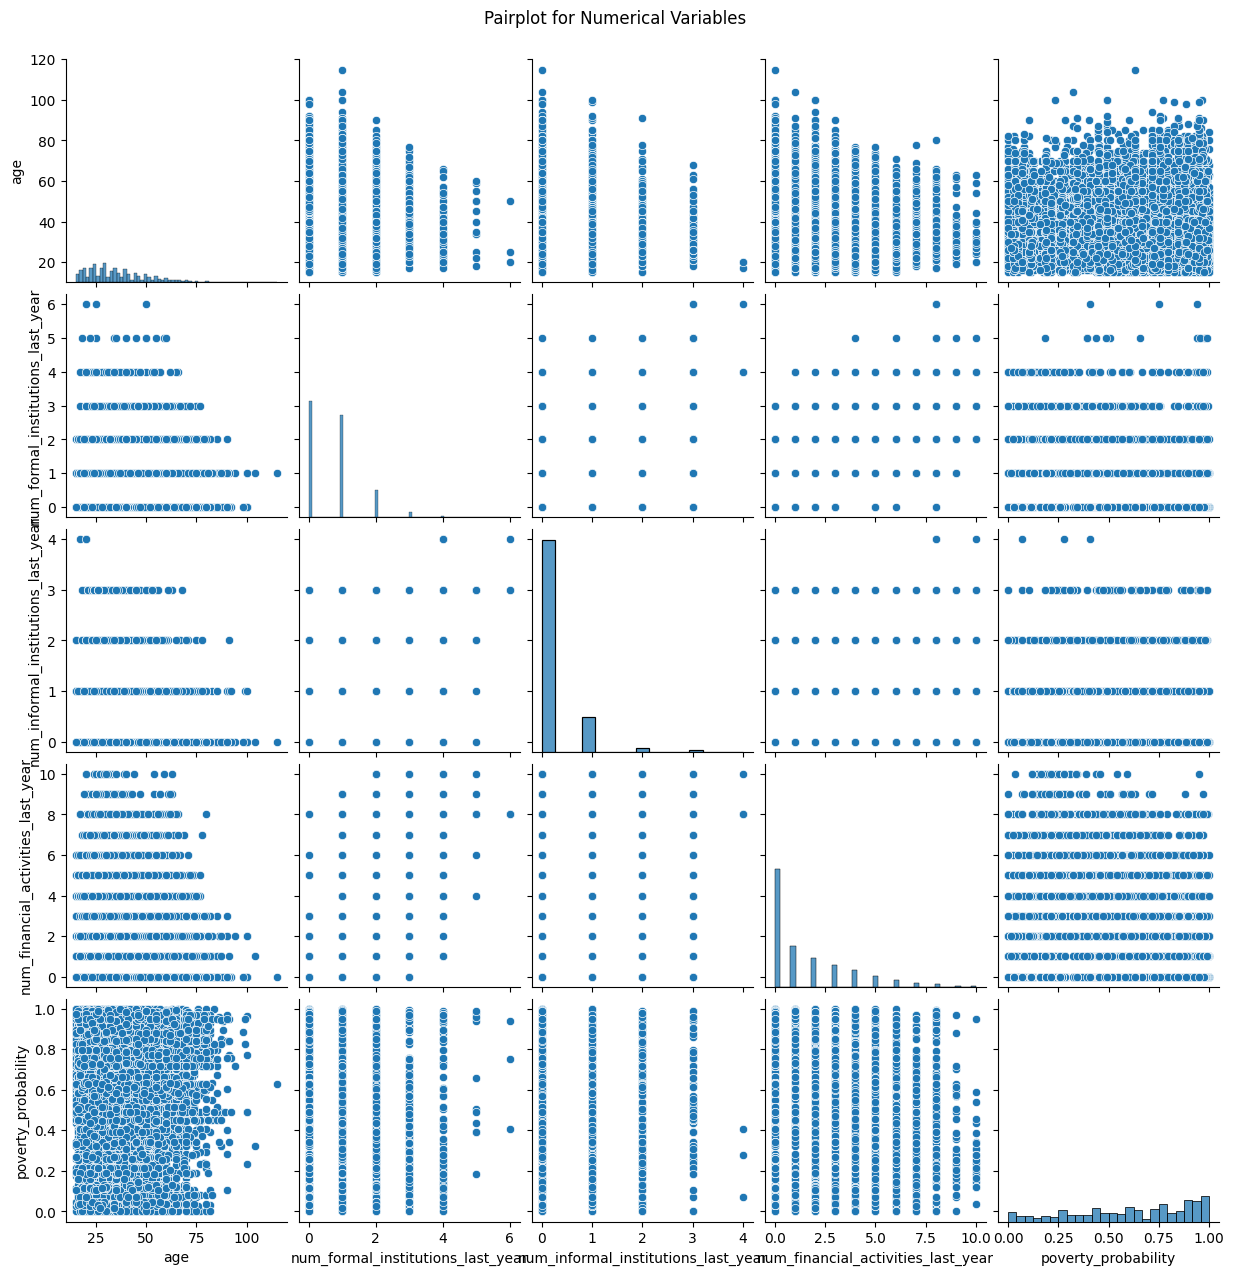

In [10]:
# Pairplot for numerical variables
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot for Numerical Variables', y=1.02)
plt.show()